In [24]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor

In [25]:
df = pd.read_csv("/media/sudarshan/Windows-SSD/Users/sudar/OneDrive/Documents/Neuro Calm/new_eeg_labeled_dataset.csv")

In [26]:
df_cleaned = df.applymap(lambda x: float(str(x).replace("+AC0-", "-").replace("+", "").strip()) if isinstance(x, str) else float(x) if isinstance(x, int) else x)
print(df_cleaned)

/tmp/ipykernel_178072/1437667416.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(lambda x: float(str(x).replace("+AC0-", "-").replace("+", "").strip()) if isinstance(x, str) else float(x) if isinstance(x, int) else x)


           Fc5.      Fc3.      Fc1.      Fcz.      Fc2.      Fc4.      Fc6.  \
0     -0.000089 -0.000087 -0.000082 -0.000071 -0.000080 -0.000082 -0.000060   
1     -0.000039 -0.000073 -0.000082 -0.000077 -0.000091 -0.000102 -0.000089   
2     -0.000033 -0.000081 -0.000092 -0.000082 -0.000101 -0.000111 -0.000094   
3     -0.000051 -0.000081 -0.000088 -0.000078 -0.000104 -0.000108 -0.000079   
4     -0.000055 -0.000084 -0.000100 -0.000090 -0.000120 -0.000121 -0.000090   
...         ...       ...       ...       ...       ...       ...       ...   
19995  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19996  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19997  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19998  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19999  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           C5..      C3..      C1..  ...      Po3. 

In [27]:
# Separate EEG data and label
eeg_features = df_cleaned.drop(columns=['label',"timestamp"])
labels = df_cleaned['label']
print(eeg_features)
print(labels)

           Fc5.      Fc3.      Fc1.      Fcz.      Fc2.      Fc4.      Fc6.  \
0     -0.000089 -0.000087 -0.000082 -0.000071 -0.000080 -0.000082 -0.000060   
1     -0.000039 -0.000073 -0.000082 -0.000077 -0.000091 -0.000102 -0.000089   
2     -0.000033 -0.000081 -0.000092 -0.000082 -0.000101 -0.000111 -0.000094   
3     -0.000051 -0.000081 -0.000088 -0.000078 -0.000104 -0.000108 -0.000079   
4     -0.000055 -0.000084 -0.000100 -0.000090 -0.000120 -0.000121 -0.000090   
...         ...       ...       ...       ...       ...       ...       ...   
19995  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19996  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19997  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19998  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19999  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           C5..      C3..      C1..  ...      P8.. 

In [28]:
X = eeg_features[labels == 0].values.tolist()
Y = X[1:]
print(X[0])
print(Y[1])

[-8.9e-05, -8.7e-05, -8.2e-05, -7.1e-05, -8e-05, -8.2e-05, -6e-05, -4.4e-05, -6.4e-05, -6.9e-05, -6.4e-05, -7.9e-05, -7.8e-05, -6.2e-05, -6.8e-05, -7.8e-05, -7.7e-05, -7.2e-05, -7.6e-05, -6.9e-05, -6.3e-05, -0.000168, -0.000157, -0.000165, -0.000177, -0.000169, -0.000119, -0.000115, -0.000128, -0.000125, -0.00013, -0.000117, -0.000101, -0.000108, -0.0001, -9.7e-05, -0.0001, -9.2e-05, -7.3e-05, -8.1e-05, -4e-05, -8.5e-05, -3.1e-05, -6.3e-05, -4.2e-05, -4.5e-05, -2.6e-05, -6.6e-05, -0.000103, -8.6e-05, -9.7e-05, -0.000102, -9.7e-05, -9.1e-05, -8.9e-05, -5e-05, -7.3e-05, -9.3e-05, -0.000108, -0.0001, -7.1e-05, -8.7e-05, -5.9e-05, 5e-06]
[-3.3e-05, -8.1e-05, -9.2e-05, -8.2e-05, -0.000101, -0.000111, -9.4e-05, -2.4e-05, -7.1e-05, -7.4e-05, -7e-05, -9.2e-05, -0.000105, -8.7e-05, -5.8e-05, -7.6e-05, -7.3e-05, -7.2e-05, -8.8e-05, -8.6e-05, -7.7e-05, -0.000106, -9e-05, -0.000125, -9.5e-05, -8.7e-05, -0.000109, -0.00011, -0.000137, -5.4e-05, -7.1e-05, -0.000114, -0.000104, -0.000112, -0.000108, 

In [29]:
# Trim to equal length
min_len = min(len(X), len(Y))
print(min_len,len(X),len(Y))
X = X[:min_len]
Y = Y[:min_len]

10079 10080 10079


In [30]:
# Calculate Z = X - Y
Z = [[x_i - y_i for x_i, y_i in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)]
print(Z[1])

[-5.999999999999997e-06, 8.000000000000005e-06, 9.999999999999999e-06, 4.9999999999999996e-06, 9.999999999999999e-06, 9.000000000000002e-06, 4.9999999999999996e-06, 1e-05, 3.000000000000005e-06, -3.000000000000005e-06, -7.0000000000000075e-06, -5.999999999999997e-06, 1.0000000000000108e-06, -5.999999999999997e-06, -2.000000000000001e-06, -7.999999999999991e-06, -1.3000000000000004e-05, -1.1999999999999994e-05, -8.000000000000005e-06, -6.999999999999994e-06, -9.999999999999999e-06, 4.5e-05, 4.000000000000002e-06, 9.999999999999999e-06, 4.600000000000001e-05, 3.6e-05, 1.5000000000000012e-05, 1.2000000000000007e-05, 1.9999999999999998e-05, 3.9e-05, 1.2000000000000007e-05, 4.9999999999999996e-06, 1.1999999999999994e-05, 1.0999999999999996e-05, 1.299999999999999e-05, 1.4000000000000001e-05, 0.0, 9.999999999999972e-07, 3.6e-05, -4.9999999999999996e-06, 3.4e-05, -1.9999999999999998e-05, 1.1999999999999999e-05, -9.999999999999996e-06, -2.8999999999999997e-05, -1.4000000000000001e-05, -2.100000

In [31]:
# Extract first 5 columns and 300 rows from Z
Z_df = pd.DataFrame(Z)
Z_subset = Z_df.iloc[:100, :3]
print(Z_subset)

           0         1             2
0  -0.000050 -0.000014  0.000000e+00
1  -0.000006  0.000008  1.000000e-05
2   0.000018  0.000000 -4.000000e-06
3   0.000004  0.000003  1.200000e-05
4  -0.000009 -0.000014 -8.000000e-06
..       ...       ...           ...
95  0.000005  0.000011 -4.000000e-06
96  0.000012  0.000009  1.000000e-06
97 -0.000010 -0.000019 -2.400000e-05
98  0.000014  0.000013  1.000000e-05
99  0.000020  0.000021  3.300000e-05

[100 rows x 3 columns]


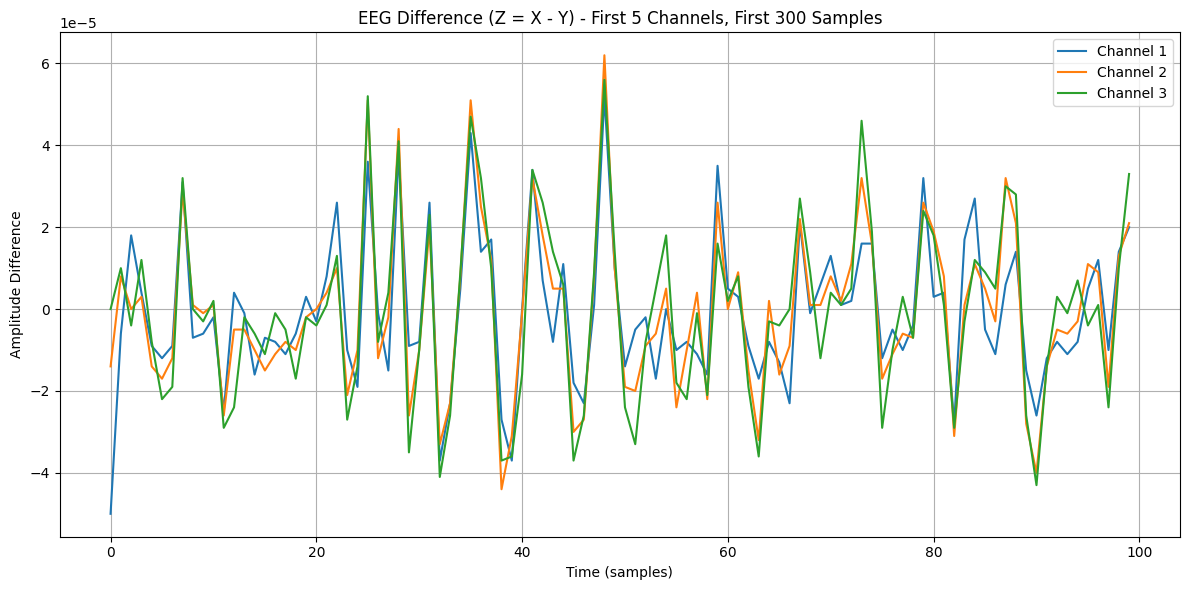

In [32]:
# Plot the graph
plt.figure(figsize=(12, 6))
for col in Z_subset.columns:
    plt.plot(Z_subset[col], label=f'Channel {col + 1}')

plt.title("EEG Difference (Z = X - Y) - First 5 Channels, First 300 Samples")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude Difference")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Z, test_size=0.2, random_state=42)

In [34]:
base_model = HistGradientBoostingRegressor()
model = MultiOutputRegressor(base_model)
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=HistGradientBoostingRegressor())

In [36]:
y_pred = model.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.7377492973681736e-10


In [38]:
import joblib
joblib.dump(model, '/media/sudarshan/Windows-SSD/Users/sudar/OneDrive/Documents/Neuro Calm Updated/Model 2/hist_gradient_boosting_model.joblib')
print("Model saved as 'Neurobeam.joblib'")

Model saved as 'Neurobeam.joblib'


In [ ]:
model = joblib.load('/media/sudarshan/Windows-SSD/Users/sudar/OneDrive/Documents/Neuro Calm Updated/Model 2/hist_gradient_boosting_model.joblib')
current_stress_features = [[-8.9e-05, -8.7e-05, -8.2e-05, -7.1e-05, -8e-05, -8.2e-05, -6e-05, -4.4e-05, -6.4e-05, -6.9e-05, -6.4e-05, -7.9e-05, -7.8e-05, -6.2e-05, -6.8e-05, -7.8e-05, -7.7e-05, -7.2e-05, -7.6e-05, -6.9e-05, -6.3e-05, -0.000168, -0.000157, -0.000165, -0.000177, -0.000169, -0.000119, -0.000115, -0.000128, -0.000125, -0.00013, -0.000117, -0.000101, -0.000108, -0.0001, -9.7e-05, -0.0001, -9.2e-05, -7.3e-05, -8.1e-05, -4e-05, -8.5e-05, -3.1e-05, -6.3e-05, -4.2e-05, -4.5e-05, -2.6e-05, -6.6e-05, -0.000103, -8.6e-05, -9.7e-05, -0.000102, -9.7e-05, -9.1e-05, -8.9e-05, -5e-05, -7.3e-05, -9.3e-05, -0.000108, -0.0001, -7.1e-05, -8.7e-05, -5.9e-05, 5e-06]]

predictions = model.predict(current_stress_features)
print("Predicted stress levels:", predictions)
